In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

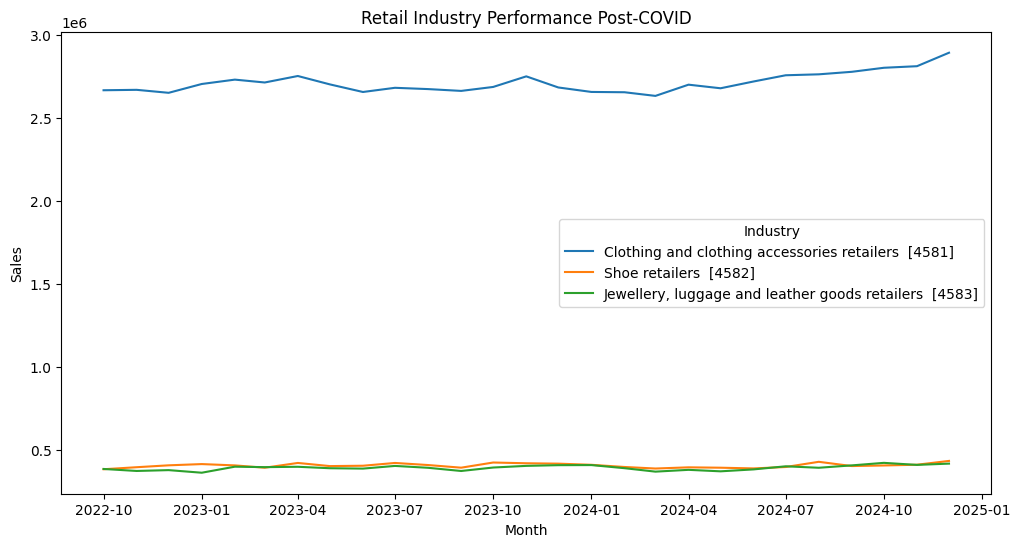

/var/folders/vh/zss70z7x4llcd4_hh7j1m5xr0000gn/T/ipykernel_84046/1530103905.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_cars_df["Month_Num"] = used_cars_df["Month"].dt.month


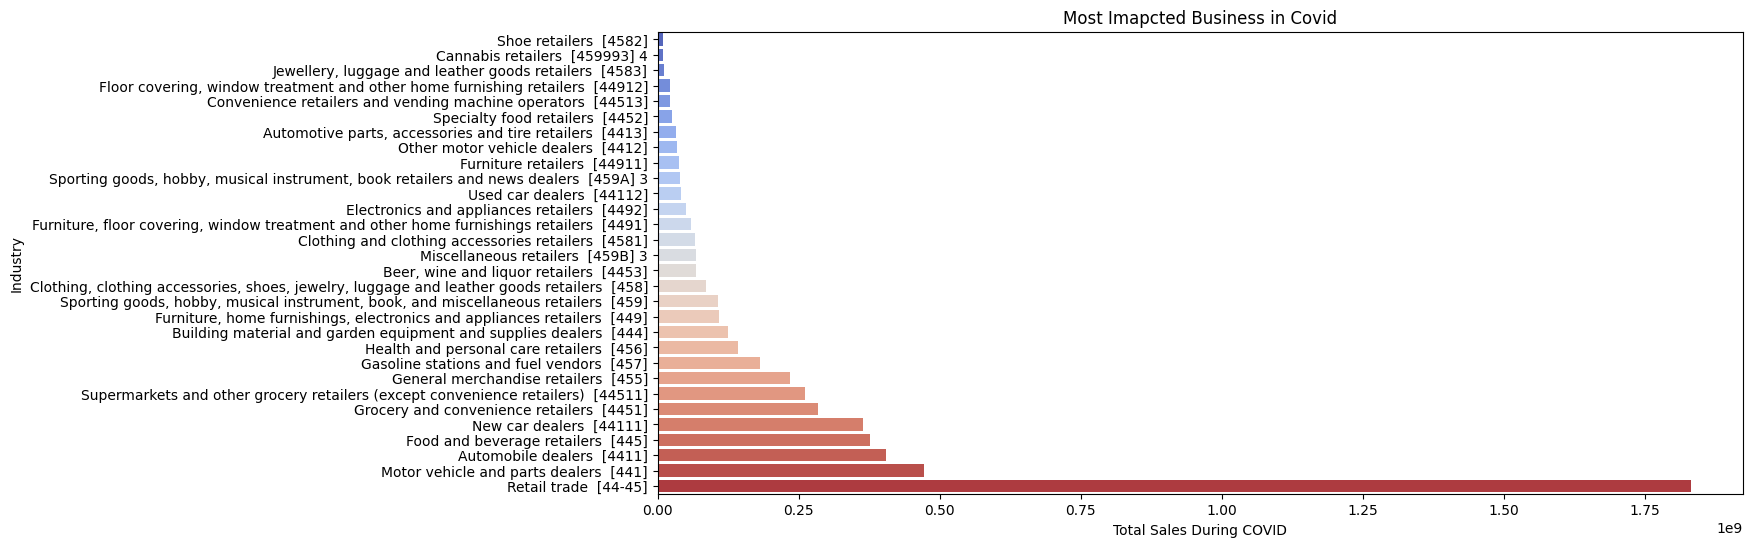

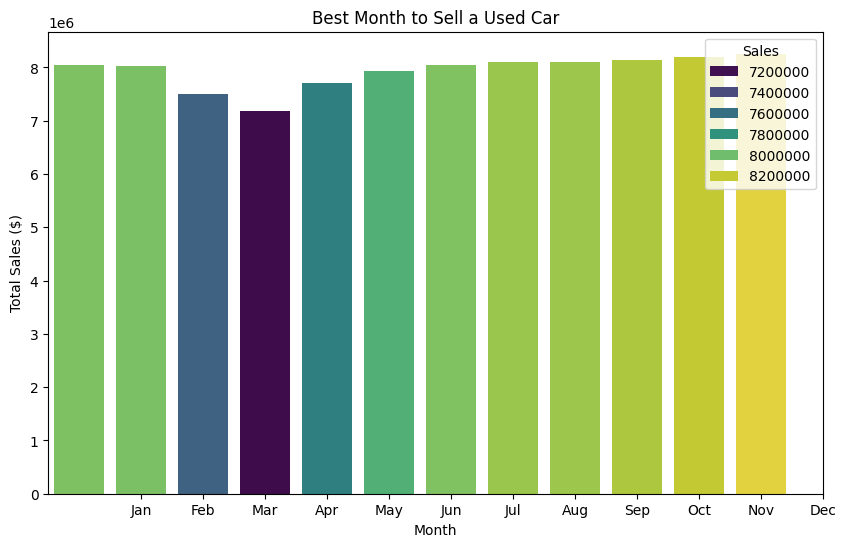

In [42]:
df = pd.read_csv("assignment_5_dat_file.csv")

df_melted = df.melt(id_vars= ["North American Industry Classification System (NAICS)"],
                    var_name="Month", value_name="Sales"
                    )
df_melted["Sales"] = df_melted["Sales"].str.replace(",", "").astype(float)
df_melted['Month'] = pd.to_datetime(df_melted["Month"], format="%b-%y")
df_melted.rename(columns={"North American Industry Classification System (NAICS)": "Industry"}, inplace=True)


def plot_industry_performance():

    industries = ["Clothing and clothing accessories retailers  [4581]", 
                  "Shoe retailers  [4582]", 
                  "Jewellery, luggage and leather goods retailers  [4583]"]
    
    industry_df = df_melted[df_melted["Industry"].isin(industries)]
    
    post_covid_df = industry_df[industry_df["Month"] >= '2022-10-01']

    plt.figure(figsize=(12,6))
    sns.lineplot(data= post_covid_df, x= "Month", y="Sales", hue="Industry").set(
        xlabel = "Month",
        ylabel="Sales",
        title="Retail Industry Performance Post-COVID"
    )

    plt.show()
    return 


def plot_most_impacted_retail():
    covid_df = df_melted[(df_melted["Month"] >= "2020-03-01") & (df_melted["Month"]<="2022-09-30")]

    impact_df = covid_df.groupby("Industry")["Sales"].sum().sort_values()

    plt.figure(figsize=(14,6))
    sns.barplot(x=impact_df.values, y=impact_df.index, palette="coolwarm", hue=impact_df.index)

    plt.title("Most Imapcted Business in Covid")
    plt.xlabel("Total Sales During COVID")
    plt.ylabel("Industry")

    return


def plot_best_month_used_cars():
    used_cars_df = df_melted[df_melted["Industry"] == "Used car dealers  [44112]"]

    used_cars_df["Month_Num"] = used_cars_df["Month"].dt.month

    monthly_sales = used_cars_df.groupby("Month_Num")["Sales"].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=monthly_sales, x="Month_Num", y="Sales", palette="viridis", hue ='Sales')

    plt.title("Best Month to Sell a Used Car")
    plt.xlabel("Month")
    plt.ylabel("Total Sales ($)")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()




plot_industry_performance()
plot_most_impacted_retail()
plot_best_month_used_cars()



## 1. Industry Performance Post-COVID
The clothing, accessories, shoes, jewelry, luggage, and leather goods retail sector exhibited mixed performance after COVID restrictions were lifted. Shoe retailers and jewelry, luggage, and leather goods retailers had similar trends but remained at lower sales levels. In contrast, clothing and clothing accessories retailers saw stronger post-pandemic growth, indicating a faster recovery.

## 2. Most Impacted Retail Business During COVID
Among all retail sectors, shoe retailers experienced the most significant decline in sales during COVID-19. This sharp drop reflects reduced demand for footwear as people stayed home, leading to fewer purchases of shoes for work, travel, or social events. Other industries, such as jewelry and luggage retailers, also struggled, likely due to decreased travel and discretionary spending.

## 3. Best Month to Sell a Used Car
The best month to sell a used car is November, as it consistently records the highest sales in the dataset. This trend could be driven by end-of-year promotions, holiday shopping, and increased demand for vehicles before winter.